In [17]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio.Portfolio as pf
import riskfolio.PlotFunctions as plf
import matplotlib as plt
import plotly.graph_objects as go

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import black_litterman, risk_models
from pypfopt.black_litterman import BlackLittermanModel
from pypfopt import expected_returns
from pypfopt import risk_models
from pypfopt import EfficientFrontier, objective_functions

In [2]:
start = "2016-01-01"
end = "2020-12-30"

# Tickers of assets
assets = ['STX', 'TXN', 'ITW', 'LRCX', 'ORCL', 'QCOM', 'AAPL', 'IBM', 'AVGO']
assets.sort()

In [3]:
data = yf.download(assets, start = start, end = end, threads = False)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  9 of 9 completed


In [4]:
Y = data[assets].pct_change().dropna()

In [5]:
port = pf.Portfolio(returns = Y) # Building the portfolio object
port.assets_stats(method_mu= 'hist', method_cov= 'hist')  # Method to estimate expected returns & covariance matrix based on historical data.

In [10]:
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 
points = 50


In [11]:
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

\\userFS\joa512\w2k\Applications\Python\Python38\site-packages\riskfolio\RiskFunctions.py:348: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)
C:\Apps\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
\\userFS\joa512\w2k\Applications\Python\Python38\site-packages\riskfolio\RiskFunctions.py:348: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)
C:\Apps\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
C:\Apps\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were

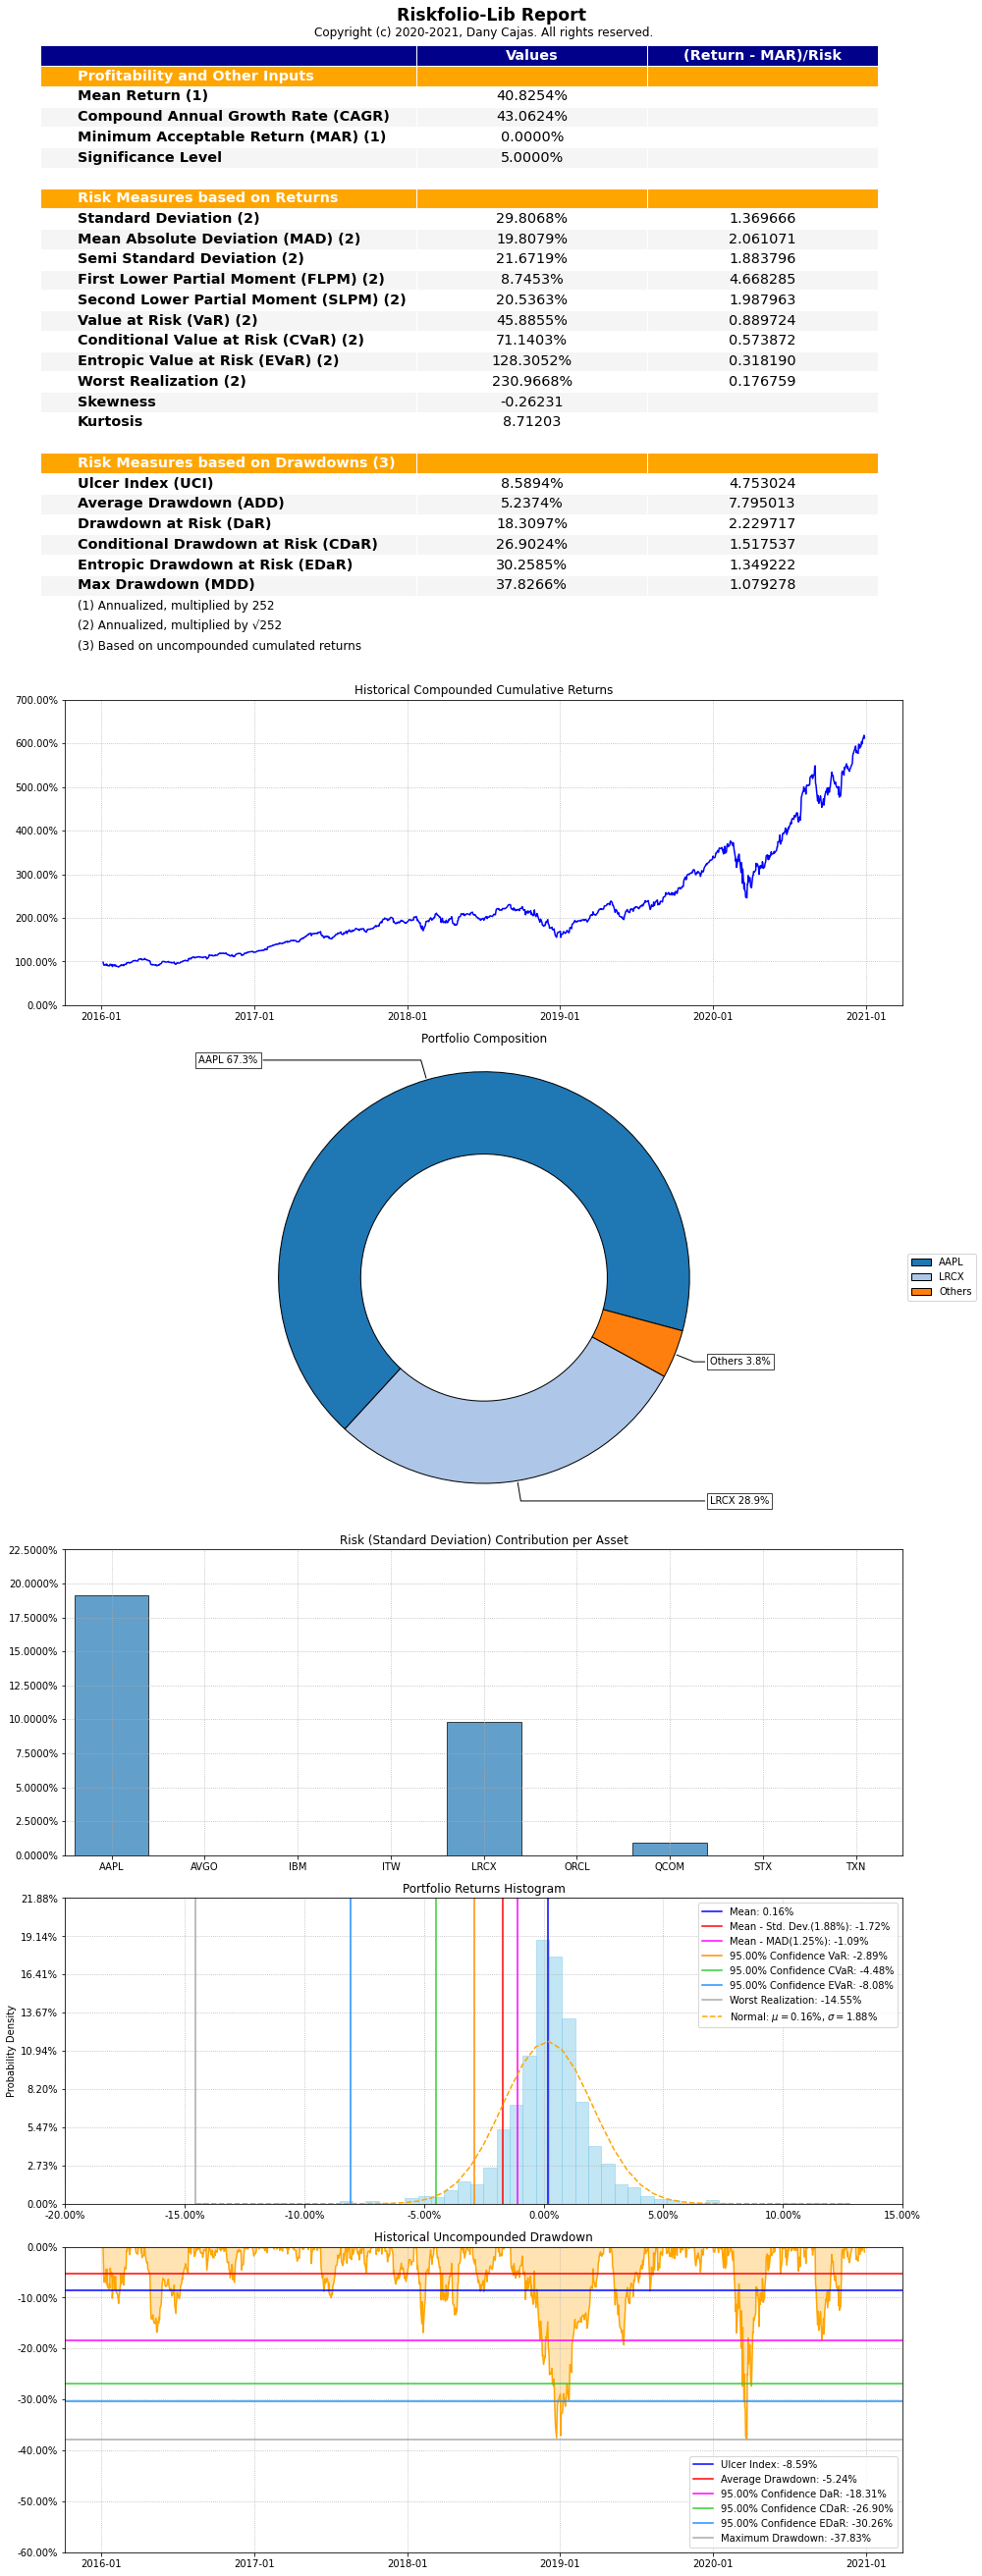

In [12]:
import riskfolio.Reports as rp

ax_report = rp.jupyter_report(Y, w, rm='MV', rf=0, alpha=0.05, height=6, width=14,
                       others=0.05, nrow=25)

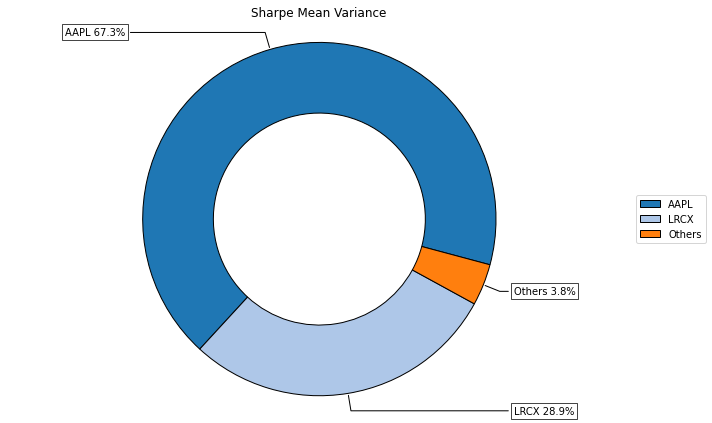

In [13]:
ax = plf.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow = 25, cmap = "tab20", height=6, width=10, ax=None)

In [19]:
frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets
port.portfolio_performance()

AttributeError: 'Portfolio' object has no attribute 'portfolio_performance'

In [ ]:
ax1 = plf.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm="MV", rf=0, alpha=0.01,  cmap='viridis', w=w, label="Max Risk Adjusted Return Portfolio", marker='*', s=16, c='r', height=6, width=10, ax=None)

In [ ]:
ax2 = plf.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [ ]:
rm = 'CVaR' # Risk measure
w = port.optimization(model="Classic",rm=rm,obj='Sharpe',rf=0, l=0,hist=True)
ax_sharpe = plf.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
  height=6, width=10, ax=None)

In [ ]:
frontier = port.efficient_frontier(model='Classic', rm=rm, points=points, rf=0, hist=True)
ax_final = plf.plot_frontier(w_frontier=frontier,    #w_frontier (DataFrame) – Portfolio weights of some points in the efficient frontier.
                       mu=mu,
                       cov=cov,
                       returns=returns,
                       rm=rm,
                       rf=0,
                       alpha=0.01, 
                       cmap='viridis',         #cmap (cmap, optional) – Colorscale, represente the risk adjusted return ratio. The default is ‘viridis’.
                       w=w,
                       label="Max Risk Adjusted Return Portfolio",
                       marker='*',
                       s=16,
                       c='r',
                       height=6,
                       width=10,
                       ax=None)

In [ ]:
ax_sharpe_report = rp.jupyter_report(returns, w, rm='MV', rf=0, alpha=0.05, height=6, width=14,
                       others=0.05, nrow=25)